# Lecture 27 
- Determinant
- Matrix Inverse
- Matrix Rank
- Pseudo-Inverse
- Least Squares

Each system of linear equations can be represented by an **augmented matrix**. From the example in the last class, we have the following augmented matrix:

\begin{align*}
\left[\begin{array}{ccc|c} 3 & 0 & 0 & 30\\ 1 & 2 & 0 & 18 \\ 0 & 1 & -1 & 2 \end{array}\right]
\end{align*}

<div class="alert alert-info">
    <b>Augmented Matrices Operations</b>

There are three elementary row operations we can do on augmented matrices:
1. **Swap**: exchange any two rows of the augmented matrix (example: swap row 2 with row 3, $R2 \leftarrow R3$)

2. **Scale**: multiply any row by a non-zero constant (example: scale row 1 by $\frac{1}{3}$, $R1 \leftarrow \frac{1}{3}R1$)

3. **Pivot**: add a multiple of a row to another row (example: $R1 \leftarrow R1 -3R2$)
</div>

## Row Echelon Form (R.E.F.)

A matrix is said to be in **row echelon form** if:

1. Each leading entry is equal to 1
2. Each leading entry lies to the right of the leading entry above it (upper-diagonal matrices for square matrices)
3. Rows containing zeros are at the bottom of the matrix

For example,

\begin{align*}
\left[\begin{array}{ccc}1 & -4 & 0 \\ 0 & 1 & 5 \\ 0 & 0 & 1\end{array}\right]
\end{align*}

is a matrix in **row echelon form**.

We will use the **gaussian elimination** algorithm to reduce the augmented matrix into a **reduced row echelon form (R.R.E.F.)** matrix.

Once a matrix is in row echelon form, in order to solve the system of linear equations, we can:

1. Use back substitution
2. Gauss-Jordan elimination

## Consistent vs Dependent Systems

A system of linear equations can have one solution, an infinite number of solutions, or no solution. Systems of equations can be classified by the number of solutions.

* If a system has *at least one solution*, it is said to be **consistent**.

* If a consistent system has *exactly one solution*, it is **independent**.

* If a consistent system has an *infinite number of solutions*, it is **dependent**. When you graph the equations, both equations represent the same line.

* If a system has *no solution*, it is said to be **inconsistent**. The graphs of the lines do not intersect, so the graphs are parallel and there is no solution.

A system is said to be **independent** if the correspondent augmented matrix has a *unique* solution. This means that the matrix $\mathbf{A}$ in our affine equation, $\mathbf{\mathbf{y}} = \mathbf{A}\mathbf{x}$ has **independent columns** (or rows) which correspond to independent or **informative features**.

* Example: basis vectors

A system is said to be **dependent** if the correspondent augmented matrix has *infinite* solutions. This means that the matrix $\mathbf{A}$ in our affine equation, $\mathbf{\mathbf{y}} = \mathbf{A}\mathbf{x}$ has **dependent columns** (or rows). One or more columns are a **linear combination** of other columns. We can think of features to be **correlated**.


<div class="alert alert-info">
    
A system is **consistent** if and only if **no** row of the augmented matrix in row echelon form has its leading entry in the last column.
</div>

<div class="alert alert-info">

The Gauss-Jordan elimination algorithm will allow us to determine whether our system is **independent** or **dependent**.
</div>

#### Example

1. Consider the following system of linear equations:

\begin{align*}
\begin{cases} 3x = 30 \\ x + 2y = 18 \\ y - z = 2\end{cases}
\end{align*}

In [ ]:
import numpy as np
import numpy.linalg as la
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

**Observation:** All columns (and rows) of the reduced row echelon form (rref) matrix are independent (the inner product is 0, which means they are orthogonal). We have a unique solution.

We are interested in finding out whether the linear transformation $\mathbf{A}$ will *preserve* all dimensions $\iff$ linearly independent columns $\iff$ the system has a unique solution.

In fact, we know that intersections between two lines (or hyperplanes) can happen in any of three different ways:
1. the lines intersect at a unique point (i.e., solution exists and is unique),
2. the lines are coincident (that is, the equations represent the same line and there are infinitely many points of intersection; in this case a solution exists, but is not unique), or
3. the lines are parallel but not coincident (so that no solution exists).

Another matrix operation that would allow us to check if matrix $\mathbf{A}$ has linearly independent columns (unique solution) is the **determinant** of $\mathbf{A}$.

Since this quantity *determines* whether or not the system has a unique solution, it is called the
determinant of the coefficient matrix $\mathbf{A}$.

## Determinant of Matrix

The **determinant** of a square $n\times n$ matrix $\mathbf{A}$ is a unique number. It measures the scaling factor by which the linear transformation $\mathbf{A}$ changes any area or volume.

The determinant of $\mathbf{A}$ is denoted by $|\mathbf{A}|$ or $\det(\mathbf{A})$.

Consider the linear transformations $\mathbf{A} = \left[\begin{array}{cc} 3 & 0 \\ 0 & 2\end{array}\right]$ and $\mathbf{A} = \left[\begin{array}{cc} 1 & 1 \\ 0 & 1\end{array}\right]$ 

*see virtual whiteboard*

For a $2\times 2$ matrix 

$$\mathbf{A} = \left[\begin{array}{cc}a & b \\ c & d\end{array}\right]$$

the determinant is given by

$$\det(A) = |\mathbf{A}| = ad - bc$$

For a $3\times 3$ matrix

$$\mathbf{A} = \left[\begin{array}{cc}a & b & c\\ d & e & f \\ g & h & i\end{array}\right]$$

the determinant is given by

$$\det(A) = |\mathbf{A}| = a(ei-fh) + b(fg - di) + c(dh - eg)$$

We can generalize the determinant to any $n \times n$ matrix.

### Some properties of the Determinant:

1. $\det(\mathbf{I}) = 1$

2. $\det(\mathbf{A}^T) = \mathbf{A}$

3. $\det(\mathbf{A}^{-1}) = \frac{1}{\det(\mathbf{A})}$

4. For square matrices $\mathbf{A}$ and $\mathbf{B}$ of equal size, $\det(\mathbf{A}\mathbf{B}) = \det(\mathbf{A})\det(\mathbf{B})$

5. $\det(c\mathbf{A}) = c^n\det(\mathbf{A})$ for an $n\times n$ matrix $\mathbf{A}$ and constant c.

**Observation:** This linear transformation will invert the direction and scale any area by a factor of 6.

**<font color=blue>Example 2</font> Consider the following system of linear equations:**

$$\begin{cases} 4x-4y-z=-10\\ 8x-8y-2z=-20 \\ 4x+12y-5z=14 \end{cases}$$

In [ ]:
M = Matrix([[4,-4,-1,-10],[8,-8,-2,-20],[4,12,-5,14]])
M

**Observations:** 

* The linear transformation $\mathbf{A}$ only has 2 linearly independent columns (this can be easily seen from the system of equations). 

* The determinant of this transformation will be 0.

Does this system have a solution?

<!-- Yes, an infinite number of solutions. -->

**<font color=blue>Example 3</font> Consider the following system of linear equations:**

$$\begin{cases} 4x-4y-z=-6\\ 12x+4y-7z=22 \\ 4x+12y-5z=2 \end{cases}$$

In [ ]:
M = Matrix([[4,-4,-1,-6],[12,4,-7,22],[4,12,-5,2]])
M

Does this system have a solution?

<!-- This system is inconsistent, it does not have a solution.  -->

# Inverse of a Matrix

<div class="alert alert-info">
    
If the square matrix $\mathbf{A}$ has:

* **linearly independent columns**, then the matrix $\mathbf{A}$ is said to be **left-invertible**, that is, there exists a inverse matrix $\mathbf{A}^{-1}$ such that $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$.
    
* **linearly independent rows**, then the matrix $\mathbf{A}$ is said to be **right-invertible**, that is, there exists a inverse matrix $\mathbf{A}^{-1}$ such that $\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}$.

</div>

If the linear transformation $\mathbf{A}$ is invertible, then we can compute a solution directly as:

\begin{align*}
\mathbf{A}\mathbf{x} &= \mathbf{b} \\
\mathbf{A}^{-1}\mathbf{A}\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}\\
\mathbf{I}\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}\\
\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}
\end{align*}

For the moment, we will focus on the special case where $\mathbf{A}$ is square ($n \times n$). But we will see that if $\mathbf{A}$ is not square, we need to find a special matrix inverse called *pseudo-inverse*.

In this case, if $\mathbf{A}$ is invertible, then $\mathbf{x}$ is a unique solution to the equation $\mathbf{Ax} = \mathbf{b}$.

**<font color=blue>Example 4</font> Consider the system of linear equations from last class:**

\begin{cases} 3x_1 =30 \\ x_1 + 2x_2 = 18 \\ x_2 - x_3 = 2 \end{cases}

In [ ]:
# Create augmented matrix



So, we can see that $\mathbf{M}$ is a system of linearly independent equations with solutions

\begin{cases} x_1 = 10 \\ x_2 = 4 \\ x_3 = 2 \end{cases}

From above, we know that we could find these same solutions if we knew $\mathbf{A}^{-1}$ as
$$
\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}
$$

Let's see how we can find $\mathbf{A}^{-1}$ by extending the Gauss-Jordan algorithm: *On electronic whiteboard*.

Now let's see how we can use sympy's RREF to find the matrix inverse:

We can find the matrix inverse in numpy using the ```numpy.linalg.inv()``` function:

#### If finding the inverse via Gauss-Jordan reduction already finds the solution to a system of linear equations, what is the advantage of finding the matrix inverse?

* After finding $\mathbf{A}^{-1}$ once, can find the solution to $\mathbf{Ax} = \mathbf{b}_i$ for many different $\mathbf{b}_i$ $\mbox{easily}^{1}$.
* Can find $\mathbf{A}^{-1}$ with other algorithms at lower complexity than Gauss-Jordan.
* Matrix inverse plays an important role in **linear regression**, where we want to find the solution to an over-determined set of equations.

*$\mbox{}^1$ Note that in general, using matrix inverses to solve a system of linear equations is usually discouraged because of problems with numerical accuracy. However, for our purposes, using matrix inverses for this purpose will always be acceptable.*

## Special Case: $2 \times 2$ Matrices

In future classes, you may be required to find a matrix inverse by manual computation. 

In this class, I will only teach you how to find the inverse of a $2 \times 2$ matrix by hand.

(For any classes that require inversion of a $3 \times 3$ matrix, you can find the required manipulations in many places online.)
    
*See electronic whiteboard*

**<font color=blue>Example 5</font>**

In [ ]:
A2=np.array([[2,7], [1,6]])

A2

## Special Case: Diagonal Matrices

Let $\mathbf{D}$ be a diagonal matrix:

\begin{align*}
D &= \operatorname{diag}(d_0,d_1,\dots,d_{n-1}) = \left[\begin{array}{cccc}d_0 & 0 &\dots & 0\\ 0 & d_1 & \dots & 0\\ \vdots & \vdots & \ddots & \vdots\\0 & 0 & \dots & d_{n-1}\end{array}\right]
\end{align*}

Its matrix inverse is:

\begin{align*}
D^{-1} &= \operatorname{diag}\left(\frac{1}{d_0},\frac{1}{d_1},\dots,\frac{1}{d_{n-1}}\right) = \left[\begin{array}{cccc}\frac{1}{d_0} & 0 &\dots & 0\\ 0 & \frac{1}{d_1} & \dots & 0\\ \vdots & \vdots & \ddots & \vdots\\0 & 0 & \dots & \frac{1}{d_{n-1}}\end{array}\right]
\end{align*}

## Special Case: Orthogonal Matrices

Recall that the Gram-Schmidt algorithm found a set of *orthonormal basis vectors*.

**Orthonormal** means both: 
* the vectors are orthogonal $\mathbf{a}_{i}^{T} \mathbf{a}_j=0,~~ i \ne j$
* the vectors are normalized $\forall i, ~ \| \mathbf{a}_i \|^2 =1$

If we have $n$ $n$-vectors, then we can check both of these conditions simultaneously if we hstack the vectors into a matrix 

\begin{align*}
\mathbf{A} = \begin{bmatrix} \mathbf{a}_0 | & \mathbf{a}_1 | & \dots | & \mathbf{a}_{n-1} \end{bmatrix}
\end{align*}

as
\begin{align*}
\mathbf{A}^T \mathbf{A} = \mathbf{I}
\end{align*}

<div class="alert-info">
    <b>Orthogonal Matrix</b>
    
An $n \times n$ matrix $\mathbf{A}$ is an *orthogonal matrix* if it satisfies
\begin{align*}
\mathbf{A}^T \mathbf{A} = \mathbf{I}
\end{align*}

</div>

<div class="alert-info">
    <b>Gram Matrix</b>
    
For a matrix $\mathbf{A}$, the matrix $\mathbf{A}^T \mathbf{A}$ is called the **Gram matrix**.

</div>

Thus, a square matrix is orthogonal if its Gram matrix is the identity matrix.

* Note that the Gram matrix is defined even for matrices that are not square!

* Note that the equation $\mathbf{A}^T \mathbf{A} = \mathbf{I}$ implies that the inverse of an orthogonal matrix $\mathbf{A}$ is its transpose!

___

For general $m \times n$ matrices, they may have left inverses,  right inverses, both, or no inverse matrix.

If a matrix $\mathbf{A}$ has both a left inverse $\mathbf{Y}$ and a right inverse $\mathbf{X}$, then we say the matrix is *invertible* and denote $\mathbf{X}=\mathbf{Y}$ by $\mathbf{A}^{-1}$.

<div class="alert alert-success">

Only square matrices ($n \times n$) can have both (and the same) left and right inverses.
</div>

If a matrix $\mathbf{A}$ is square, then the following are equivalent:
1. $\mathbf{A}$ is invertible
2. The *columns* of $\mathbf{A}$ are linearly independent
3. The *rows* of $\mathbf{A}$ are linearly independent
4. $\mathbf{A}$ has a left inverse
5. $\mathbf{A}$ has a right inverse
6. $|\mathbf{A}|\neq 0$

Since the columns of $\mathbf{A}$ are linearly independent, we know they form a **basis** for $\mathbf{R}^n$!

(as do the rows)

### Properties of Matrix Inverse

1. If $\mathbf{A}$ is invertible, then its transpose is also invertible and

\begin{align*}
\left (\mathbf{A}^T \right)^{-1} = \left(\mathbf{A}^{-1} \right)^T
\end{align*}

2. If $\mathbf{A}$ and $\mathbf{B}$ are $n \times n$ invertible matrices, then

\begin{align*}
\left(\mathbf{AB}\right)^{-1} = \mathbf{B}^{-1} \mathbf{A}^{-1}
\end{align*}

Check:
\begin{align*}
\left(\mathbf{AB}\right)^{-1} \left(\mathbf{AB}\right) &=
\mathbf{B}^{-1} \mathbf{A}^{-1}\left(\mathbf{AB}\right)\\
&= \mathbf{B}^{-1} \left( \mathbf{A}^{-1} \mathbf{A} \right)\mathbf{B}\\
&=\mathbf{B}^{-1} \mathbf{I} \mathbf{B}\\
&=\mathbf{B}^{-1} \mathbf{B} \\
&=\mathbf{I}\\
\end{align*}

**<font color=blue>Example </font> Given a random, invertible $3 \times 3$ matrix $\mathbf{A}$, find the coefficients to represent $\mathbf{x}=[3, 7, 9]^T$ as a linear combination of the columns of $\mathbf{A}$:**

In [ ]:
npr.seed(7)

A = npr.randint(10,size=(3,3))
A

Of course, we can do all those operations in one matrix-vector multiplication:

___

## Application: Polynomial Interpolation

(Read [Boyd's book Section 11.4](http://vmls-book.stanford.edu/vmls.pdf))

Suppose we have a set of data points $(x_i,y_i)$, $i=1,2, \ldots n$.

For a set of $n$ data points, we can always find a polynomial of degree $n-1$ that can fit those data points.

(For example, we can draw a line through any two points in the plane.)

Here we show how to find that polynomial.

Let the polynomial be 

\begin{align*}
p(x) = c_0 x^0 + c_1 x^1 +c_2 x^2 + \ldots + c_{n-1} x^{n-1}
\end{align*}

Then we want to find the values of $c_0, c_1, \ldots, c_{n-1}$ that solve the set of equations:
\begin{align*}
\\p(x_0) &= y_0 \\
p(x_1) &= y_1 \\
&\vdots\\
p(x_{n-1}) &= y_{n-1} \\
\end{align*}

At first glance, this may seem to be a set of **nonlinear** equations. But that is not the case, because the powers of $x_i$ are all **deterministic constants**.

So, we get linear equations in the coefficients $c_i$'s!

Let 

\begin{align*}
\mathbf{A} = \begin{bmatrix} 1 & x_0 & x_{0}^2 & x_{0}^3 & \cdots \\ 1 & x_1 & x_{1}^2 & x_{1}^3 & \cdots \\ \vdots & \vdots & \vdots & \vdots & \cdots\\ 1 & x_{n-1} & x_{n-1}^2 & x_{n-1}^3 & \cdots \end{bmatrix}
\end{align*}

and let

* $\mathbf{c} = \left[ c_0, c_1, \ldots c_{n-1} \right]^T$ be the vector of coefficients
* $\mathbf{y} = \left[ y_0, y_1, \ldots y_{n-1} \right]^T$ be the vector of $y$-values

Then the coefficients satisfy 

\begin{align*}
\mathbf{A}\mathbf{c} = \mathbf{y}
\end{align*}

If $\mathbf{A}$ is invertible, then 

\begin{align*}
\mathbf{c} = \mathbf{A}^{-1} \mathbf{y}
\end{align*}

Let's try an example. Suppose we have the following data observations:

\begin{align*}
(x,y): ~~~ (1,3),~~~ (2, -1), ~~~ (3,2) ~~~ (4,1)
\end{align*}

Is $\mathbf{A}$ invertible?

## Rank of a Matrix

What happens if we try to fit this with fewer coefficents?

Now we only have 2 independent vectors, so they do not form a basis for $\mathbb{R}^4$.

In general, we cannot find a solution, and we cannot use the matrix inverse to find the solution.

This will generally the case for linear transformation $\mathbf{A}$ that are not **full rank**.

<div class="alert-info">
    <b>Matrix Rank</b>
    
The **rank** of a matrix $\mathbf{A}$ is the **dimension of the vector space** generated (or spanned) by its columns. 
    
The rank of a matrix $\mathbf{A}$ corresponds to the maximal number of **linearly independent columns** of $\mathbf{A}$.
</div>

We denote the rank of a matrix $\mathbf{A}$ as:

$$\operatorname{rk}(\mathbf{A}) \text{ or } \operatorname{rank}(\mathbf{A})$$

For a matrix $\mathbf{A}$ of size $n\times m$:

$$\operatorname{rank}(\mathbf{A}) \leq \min(n,m)$$

A matrix is said to have **full rank** if its rank equals the largest possible dimension, that is, $\max(n,m)$.

In [ ]:
A3 = np.array([[1,1,2],[1,2,4],[1,3,6]])
A3

___

# Least Squares: Approximate Solutions to Over-Determined Problems

If $\mathbf{A}$ is a tall matrix with independent columns and $\mathbf{Ax}=\mathbf{b}$ is overconstrained, there is no solution $\mathbf{x}$

Let's look at these equations

$$ \begin{bmatrix} 1 & 1\\ 1 & 2 \\ 1 & 3\\ 1 & 4 \end{bmatrix} \begin{bmatrix} x \\ y\\ \end{bmatrix} = \begin{bmatrix} 3 \\ -1 \\ 2 \\ 1 \end{bmatrix} $$

$$\begin{cases} x+y &= 3\\ x +2y &= -1 \\ x+ 3y &=2 \\x + 4y &= 1 \end{cases}$$

Solving for $y$:

$$\begin{cases} y &= -x + 3\\ y &= -\frac{1}{2}x - \frac{1}{2} \\ y &= -\frac{1}{3}x + \frac{2}{3} \\ y &= -\frac{1}{4}x + \frac{1}{4} \end{cases}$$

In [ ]:
xln=np.linspace(0,10)

y1 = -xln + 3
y2 = -1/2*xln - 1/2
y3 = -1/3*xln + 2/3
y4 = -1/4*xln + 1/4

plt.plot(xln,y1, xln,y2, xln,y3, xln,y4)
plt.legend(['$y_1$','$y_2$','$y_3$','$y_4$'],fontsize=15);

Clearly, there is no single solution to this system of equations.

We try to minimize the residual error

$$\mathbf{r} = \mathbf{Ax}-\mathbf{b}$$

As usual, we minimize a squared error, the squared norm is given as:

$$ \left\| \mathbf{Ax}-\mathbf{b} \right\|^2 =  \left\| \mathbf{r} \right\|^2 = r_{0}^{2} + r_{1}^{2} + \cdots + r_{n-1}^{2}$$

The problem is sometimes called **<font color=blue>linear least squares</font>** because $\mathbf{r}$ is an **affine function** of $\mathbf{x}$.

Two basic ways to view this problem are:

### Column Interpretation

The vector $\mathbf{x}$ can be viewed as the coefficients to linearly combine the columns of $\mathbf{A}$ to form a vector "close to" $\mathbf{b}$:

$$
\left\| \mathbf{Ax}-\mathbf{b} \right\|^2 =
\left\|  \left( x_0 \mathbf{a}_0 + x_1 \mathbf{a}_1 + \cdots + x_{n-1} \mathbf{a}_{n-1} \right) -\mathbf{b}
\right\|^2
$$

### Row Interpretation

Let the rows of $\mathbf{A}$ be $\tilde{\mathbf{a}}_{0}^{T}, \tilde{\mathbf{a}}_{1}^{T}, \ldots, \tilde{\mathbf{a}}_{n-1}^{T}$.

Then the residual components are

$$ r_i = \tilde{\mathbf{a}}_{i}^{T} \mathbf{x} - b_i $$

The least-squares objective is then

$$ \left\| \mathbf{Ax}-\mathbf{b} \right\|^2 = 
(\tilde{\mathbf{a}}_{0}^{T} \mathbf{x} - b_0)^2  + 
(\tilde{\mathbf{a}}_{1}^{T} \mathbf{x} - b_1)^2 + \cdots + 
(\tilde{\mathbf{a}}_{n-1}^{T} \mathbf{x} - b_{n-1})^2 $$

### Analytical Solution

We can find the minimum using calculus.

Let $f(\mathbf{x}) = \left\| \mathbf{Ax} - \mathbf{b} \right\|^2$

Then any minimum solution $\hat{\mathbf{x}}$ will satisfy:

\begin{align*} \frac{\partial f}{\partial x_i} (\hat{x}) =0, ~~~ i=0,1,\ldots,n-1 \end{align*}

Or, using gradient notation:

\begin{align*} \nabla f(\hat{\mathbf{x}}) =0 \end{align*}

Without going into details of the matrix calculus (see pp. 184-185 and pp. 228-230 in Boyd's textbook), the gradient of $f(\mathbf{x})$ is

\begin{align*}\nabla f(\mathbf{x}) = 2 \mathbf{A}^T \left( \mathbf{Ax} -b \right) \end{align*}

Setting the gradient equal to zero and distributing, we have:

\begin{align*}
\mathbf{A}^T\mathbf{Ax} - \mathbf{A}^T\mathbf{b} &=0 \\
\Rightarrow \mathbf{A}^T\mathbf{Ax} &=\mathbf{A}^T\mathbf{b} \\
\end{align*}

These are called the **<font color=blue>normal equations</font>**.

If the columns of $\mathbf{A}$ are linearly independent, then the Gram matrix is invertible, and the solution is

\begin{align*} \hat{\mathbf{x}} = \left( \mathbf{A}^T \mathbf{A} \right)^{-1} \mathbf{A}^T \mathbf{b} \end{align*}

The matrix products in the last equation should look pretty familiar. They are the **<font color=blue>pseudoinverse</font>**:

\begin{align*} \hat{\mathbf{x}} = \mathbf{A}^\dagger \mathbf{b} \end{align*}

where 

\begin{align*}\mathbf{A}^{\dagger} = (\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T\end{align*}

<div class="alert-info">
    <b>Pseudoinverse for Tall Matrices</b>
    
An $n \times m$ ($n>m$) tall matrix $\mathbf{A}$ with **linearly independent columns** has a left-inverse and it's called the **pseudoinverse**:

\begin{align*}
\mathbf{A}^{\dagger} = (\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T
\end{align*}

</div>

<div class="alert-info">
    <b>Pseudoinverse for Wide Matrices</b>
    
An $m \times n$ ($n<m$) wide matrix $\mathbf{A}$ with **linearly independent rows** has a right-inverse and it's called the **pseudoinverse**:

\begin{align*}
\mathbf{A}^{\dagger} = \mathbf{A}^T(\mathbf{A}\mathbf{A}^T)^{-1}
\end{align*}

</div>

Let's try an example. Suppose we have the following data observations:

\begin{align*}
(x,y): ~~~ (1,3),~~~ (2, -1), ~~~ (3,2) ~~~ (4,1)
\end{align*}

In [2]:
x = np.array([[1,2,3,4]]).T

y = np.array([[3,-1,2,1]]).T

x, y

(array([[1],
        [2],
        [3],
        [4]]),
 array([[ 3],
        [-1],
        [ 2],
        [ 1]]))

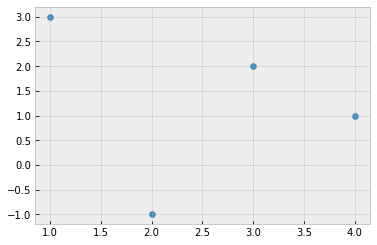

In [3]:
plt.scatter(x,y);

In [4]:
A = np.hstack([x**i for i in range(2)])
print(A)

[[1 1]
 [1 2]
 [1 3]
 [1 4]]


$$ \begin{bmatrix} 1 & 1\\ 1 & 2 \\ 1 & 3\\ 1 & 4 \end{bmatrix} \begin{bmatrix} x \\ y\\ \end{bmatrix} = \begin{bmatrix} 3 \\ -1 \\ 2 \\ 1 \end{bmatrix} $$

$$\begin{cases} x+y &= 3\\ x +2y &= -1 \\ x+ 3y &=2 \\x + 4y &= 1 \end{cases}$$

This solution matches with the one we obtain by visually inspecting the least squares surface and contour plots.

The residual is

and the squared error is

Note that like our previous work on optimal representation using squared error, the residual also satisfies the orthogonality principal:

(The residual is orthogonal to the columns of $\mathbf{A}$)

### ```Numpy``` Implementation

Let's start by using ```numpy``` functions to implement the least squares solution:

Let's consider a square system now:

In [ ]:
xl = np.linspace(-0.2,4.2, 100)

# Estimate the polynomial model
y2 = 

plt.scatter(x,y,label='Data points')
plt.plot(xl, y2,'r',label='Polynomial Model')
plt.legend(loc='center left');

Let's consider another example:

In [ ]:
# Estimate the polynomial model
y3 = 

plt.scatter(x,y,label='Data points')
plt.plot(xl, y3,'r',label='Polynomial Model')
plt.legend(loc='upper right');

Let's consider the case of wide matrix:

In [ ]:
x = np.array([[1,2,3]]).T

y = np.array([[3,-1,2]]).T

x, y

In [ ]:
# Estiamte the polynomial model
y_prediction = 

plt.scatter(x,y,label='Data points')
plt.plot(xl, y_prediction,'r',label='Polynomial Model')
plt.legend(loc='upper right');

# Linear Regression

<div class="alert-info">
    <b>Linear Regression</b>
    
One approach to solve the problem where we are dealing with an *inconsistent* and *over-determined* system of linear equations is to find the *solution* that **minimizes the least squares error**. This solution is known as **linear regression**.

</div>

We can use linear regression from two approaches:

1. By transforming the output variable (or desired response) -- we saw examples of this when we first transformed the COVID-19 data to log-space and then applied the linear regression

2. By transforming the input variable (or data samples) -- e.g. linear regression of samples polynomial representations (polynomial regression)

and then *fitting the curve* on either of these transformations.

### Example with Synthetic Data

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The input samples are $x$
* The desired values are $t + \epsilon$, but we know that $t = \sin(2\pi x)$
* Our **goal** is to find a model that fits the set of data samples $\{x_i,t_i\}_{i=1}^N$
* We also want our model to be able to correctly **predict** the desired value of a new data sample $x_{test}$

Let's generate data from the *true* underlying function, $t=\sin(2\pi x)$, which, in practice, we would not know.

In [ ]:
def NoisySinusoidalData(N, a, b, gVar):
    x = np.linspace(a,b,N)
    noise = npr.normal(0,gVar,N)
    t = np.sin(2*np.pi*x) + noise
    return x[:,np.newaxis], t[:,np.newaxis]

In [ ]:
N = 150
Ntest = 50 
a, b = [0,1] 
gVar_train = 0.5
gVar_test = 0.8
xtrain, ytrain = NoisySinusoidalData(N, a, b, gVar_train)    # training data and labels
xtrue, ytrue = NoisySinusoidalData(N, a, b, 0)             #true sine function
xtest, ytest = NoisySinusoidalData(Ntest, a, b, gVar_test) # test data and labels

plt.figure(figsize=(10,8))
plt.plot(xtrain, ytrain, 'bo', label = 'Training Data')
plt.plot(xtrue, ytrue, 'g', linewidth=4, label = 'True Sinusoidal')
plt.plot(xtest, ytest, 'r*', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

In [ ]:
def Polynomial_Regression(x,b,M):
    '''This function implements Linear Regression with polynomial representation
    of order M for input variable x and right-hand-sides vector b'''
    
    # Polynomial representations -- Linear Transformation A
    
    
    # Coefficients
    
    
    # Prediction
    
    
    # Residual
    
    
    # Mean-Squared Error
    
    
    return 

In [ ]:
M = ### define polynomial model order

A, c, ytrain_pred, r, MSE = Polynomial_Regression(xtrain, ytrain, M) 

plt.figure(figsize=(10,8))
plt.plot(xtrain,ytrain_pred,'c', label = 'Estimated Polynomial', linewidth=5)
plt.plot(xtrue,ytrue,'g', label = 'True Function', linewidth=5)
plt.plot(xtrain,ytrain,'bo', label='Training Data')
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

In [ ]:
plt.figure(figsize=(10,5))
plt.stem(c)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(c)), ['$c_{'+str(i)+'}$' for i in range(len(c))],rotation=0);

In [ ]:
def Polynomial_Regression_test(x,c):
    '''This function evaluates the performance of Polynomial Regression with
    coefficients c and test set x'''
    
    # Polynomial representations -- Linear Transformation A for test data
    
    
    # Prediction using the trained/learned coefficients
    
    
    return 

In [ ]:
# Predict model for the test data xtest using the function above and solution for the coefficients c
_, ytest_pred = Polynomial_Regression_test(xtest, c)

plt.figure(figsize=(10,8))
plt.plot(xtrain,ytrain_pred,'c', label = 'Estimated Polynomial',linewidth=4)
plt.plot(xtrue,ytrue,'g', label = 'True Function',linewidth=4)
plt.plot(xtest,ytest,'ro', label = 'Test Data')
plt.plot(xtest,ytest_pred,'-m', label = 'Test Predictions', linewidth=4)
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);